### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

sys.path.append("../../data_analysis/")
import helper as hp

In [3]:
df = pd.read_excel("/Users/michaelmoret/Desktop/Externa/data/pulling/22-02-24/20240222_WAX4concentrationsx100.xlsx")
df.head(6)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,MPa/%,g,mm,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Start Batch 20240222_bleach_WAX4_0.02mgml_,20240222_bleach_WAX4_0.02mgml_,NaN,NaN,NaN,NaN,NaN,NaN
4,20240222_bleach_WAX4_0.02mgml_1,20240222_bleach_WAX4_0.02mgml_,68.962,135.404,-25.595,66.0,64.0,ok
5,20240222_bleach_WAX4_0.02mgml_2,20240222_bleach_WAX4_0.02mgml_,54.053,63.72,-1.682,45.0,45.0,early


In [4]:
TYPE = "Break Force"

In [5]:
df = df.rename(columns={'Unnamed: 5': 'Diameter 1', 
                        'Unnamed: 6': 'Diameter 2',
                        'Unnamed: 7': 'Note'})
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Diameter 1,Diameter 2,Note
0,NaN,NaN,MPa/%,g,mm,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,NaN,NaN,NaN


In [6]:
df = df.dropna()
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Diameter 1,Diameter 2,Note
4,20240222_bleach_WAX4_0.02mgml_1,20240222_bleach_WAX4_0.02mgml_,68.962,135.404,-25.595,66.0,64.0,ok
5,20240222_bleach_WAX4_0.02mgml_2,20240222_bleach_WAX4_0.02mgml_,54.053,63.72,-1.682,45.0,45.0,early


In [7]:
df['Break Force'] = df['Break Force'].astype(float)
df['Young\'s Modulus'] = df['Young\'s Modulus'].astype(float)
df['Distance to Break'] = df['Distance to Break'].astype(float)
#df['Toughness'] = df['Toughness'].astype(float)
df['Diameter 1'] = df['Diameter 1'].astype(float)
df['Diameter 2'] = df['Diameter 2'].astype(float)
#df['Humidity'] = df['Humidity'].astype(float)

df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Diameter 1,Diameter 2,Note
4,20240222_bleach_WAX4_0.02mgml_1,20240222_bleach_WAX4_0.02mgml_,68.962,135.404,-25.595,66.0,64.0,ok
5,20240222_bleach_WAX4_0.02mgml_2,20240222_bleach_WAX4_0.02mgml_,54.053,63.720,-1.682,45.0,45.0,early


In [8]:
len(df)

401

In [9]:
df['Note'] = df['Note'].str.strip()
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Diameter 1,Diameter 2,Note
4,20240222_bleach_WAX4_0.02mgml_1,20240222_bleach_WAX4_0.02mgml_,68.962,135.404,-25.595,66.0,64.0,ok
5,20240222_bleach_WAX4_0.02mgml_2,20240222_bleach_WAX4_0.02mgml_,54.053,63.720,-1.682,45.0,45.0,early


In [10]:
df['Note'] = df['Note'].str.lower()
len(df)

401

In [11]:
df['Note'] = df['Note'].str.replace('!', '')
len(df)

401

In [12]:
len(df)

401

In [13]:
df = df[df['Test ID'] != 'Average:']
df = df[df['Test ID'] != 'S.D.']
df = df[df['Test ID'] != 'Coef. of Variation']

In [14]:
df['Average'] = ((df['Diameter 1'] + df['Diameter 2']) / 2 )/1000
df['Area'] = math.pi * (df['Average'] / 2)**2

In [15]:
df['Baseline area'] = math.pi * 0.035**2
df['Updated Young\'s Modulus'] = df['Young\'s Modulus'] * (df['Baseline area'] / df['Area'])

In [16]:
df['Break stress'] = df['Break Force'] / df['Area'] / 1000

In [17]:
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Diameter 1,Diameter 2,Note,Average,Area,Baseline area,Updated Young's Modulus,Break stress
4,20240222_bleach_WAX4_0.02mgml_1,20240222_bleach_WAX4_0.02mgml_,68.962,135.404,-25.595,66.0,64.0,ok,0.065,0.003318,0.003848,79.979598,40.805143
5,20240222_bleach_WAX4_0.02mgml_2,20240222_bleach_WAX4_0.02mgml_,54.053,63.720,-1.682,45.0,45.0,early,0.045,0.001590,0.003848,130.794914,40.064604


<Figure size 1000x600 with 0 Axes>

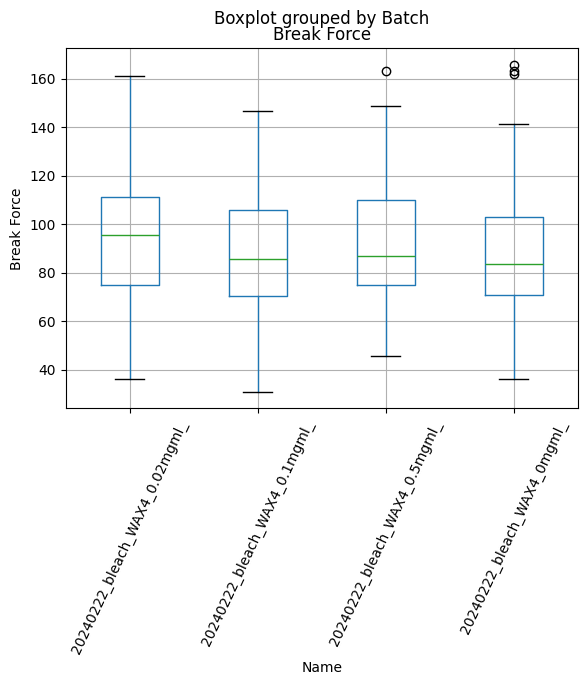

In [18]:
def do_plot(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=TYPE, by='Batch')
    plt.xlabel('Name')
    plt.ylabel(TYPE)
    plt.xticks(rotation=65)
    ## y axis from 20 to 90
    #plt.ylim(15, 90)
    plt.show()
    

do_plot(df)


In [19]:
std_by_batch_all = df.groupby('Batch')[TYPE].std()
print(std_by_batch_all)

Batch
20240222_bleach_WAX4_0.02mgml_    25.068611
20240222_bleach_WAX4_0.1mgml_     23.967990
20240222_bleach_WAX4_0.5mgml_     24.760355
20240222_bleach_WAX4_0mgml_       26.083783
Name: Break Force, dtype: float64


In [20]:
count = len(df[df['Batch'].str.contains('0mg')])
print(count)

100


In [21]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                                20240222_bleach_WAX4_0.02mgml_  \
 20240222_bleach_WAX4_0.02mgml_                           1.000   
 20240222_bleach_WAX4_0.1mgml_                            0.151   
 20240222_bleach_WAX4_0.5mgml_                            0.613   
 20240222_bleach_WAX4_0mgml_                              0.062   
 
                                 20240222_bleach_WAX4_0.1mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.151   
 20240222_bleach_WAX4_0.1mgml_                           1.000   
 20240222_bleach_WAX4_0.5mgml_                           0.351   
 20240222_bleach_WAX4_0mgml_                             0.713   
 
                                 20240222_bleach_WAX4_0.5mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.613   
 20240222_bleach_WAX4_0.1mgml_                           0.351   
 20240222_bleach_WAX4_0.5mgml_                           1.000   
 20240222_bleach_WAX4_0mgml_                             0.198   
 

let's remove the diameter 2 std away from the mean diameter 

In [22]:
df.columns

Index(['Test ID', 'Batch', 'Young's Modulus', 'Break Force',
       'Distance to Break', 'Diameter 1', 'Diameter 2', 'Note', 'Average',
       'Area', 'Baseline area', 'Updated Young's Modulus', 'Break stress'],
      dtype='object')

In [23]:
len(df)

401

In [24]:
mean_diameter = df['Average'].mean()
std_diameter = df['Average'].std()
threshold = 2 * std_diameter

df = df[abs(df['Average'] - mean_diameter) <= threshold]
len(df)

385

<Figure size 1000x600 with 0 Axes>

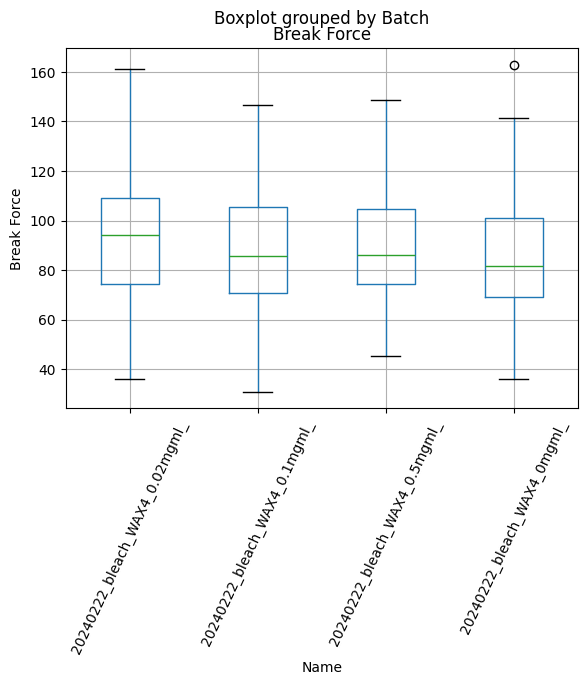

In [25]:
do_plot(df)

In [26]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                                20240222_bleach_WAX4_0.02mgml_  \
 20240222_bleach_WAX4_0.02mgml_                           1.000   
 20240222_bleach_WAX4_0.1mgml_                            0.270   
 20240222_bleach_WAX4_0.5mgml_                            0.514   
 20240222_bleach_WAX4_0mgml_                              0.040   
 
                                 20240222_bleach_WAX4_0.1mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.270   
 20240222_bleach_WAX4_0.1mgml_                           1.000   
 20240222_bleach_WAX4_0.5mgml_                           0.651   
 20240222_bleach_WAX4_0mgml_                             0.380   
 
                                 20240222_bleach_WAX4_0.5mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.514   
 20240222_bleach_WAX4_0.1mgml_                           0.651   
 20240222_bleach_WAX4_0.5mgml_                           1.000   
 20240222_bleach_WAX4_0mgml_                             0.177   
 

let's do the cleaning

In [27]:
unique_values = df['Note'].unique()
print(unique_values)

['ok' 'early' 'breaakend tape' 'earlyish (middle bias)' 'breakend'
 'breakend paper' 'slip? breakend' 'breakend (early ish)' 'early?'
 'breakend almost' 'breakend (tape)' 'early middle bias' 'breakend top'
 'breakend(top,tape)' 'short' 'breakend?' 'almost breakend' 'great' 'good'
 'slip' 'breakend and slip' 'amost breakend']


let's remove all but ok

In [28]:
len(df)

385

In [29]:
df = df[df['Note'].isin(['ok', 'good', 'great'])]
len(df)

190

<Figure size 1000x600 with 0 Axes>

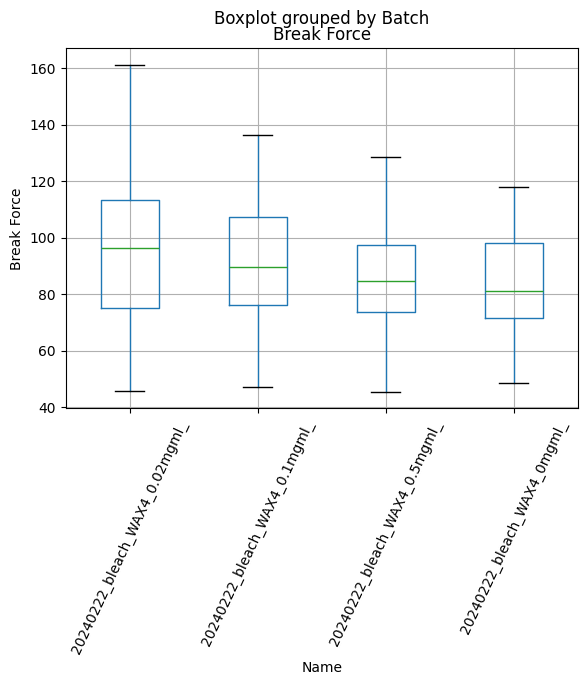

In [30]:
do_plot(df)

In [31]:
std_by_batch_ok = df.groupby('Batch')[TYPE].std()
print(std_by_batch_ok)

Batch
20240222_bleach_WAX4_0.02mgml_    24.231580
20240222_bleach_WAX4_0.1mgml_     23.007970
20240222_bleach_WAX4_0.5mgml_     20.278951
20240222_bleach_WAX4_0mgml_       17.662164
Name: Break Force, dtype: float64


In [32]:
merged_df = pd.concat([std_by_batch_all, std_by_batch_ok], axis=1)
merged_df.columns = ['std all', 'std ok']
merged_df

,std all,std ok
Batch,,
20240222_bleach_WAX4_0.02mgml_,25.068611,24.231580
20240222_bleach_WAX4_0.1mgml_,23.967990,23.007970
20240222_bleach_WAX4_0.5mgml_,24.760355,20.278951
20240222_bleach_WAX4_0mgml_,26.083783,17.662164


In [33]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                                20240222_bleach_WAX4_0.02mgml_  \
 20240222_bleach_WAX4_0.02mgml_                           1.000   
 20240222_bleach_WAX4_0.1mgml_                            0.465   
 20240222_bleach_WAX4_0.5mgml_                            0.112   
 20240222_bleach_WAX4_0mgml_                              0.024   
 
                                 20240222_bleach_WAX4_0.1mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.465   
 20240222_bleach_WAX4_0.1mgml_                           1.000   
 20240222_bleach_WAX4_0.5mgml_                           0.562   
 20240222_bleach_WAX4_0mgml_                             0.182   
 
                                 20240222_bleach_WAX4_0.5mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.112   
 20240222_bleach_WAX4_0.1mgml_                           0.562   
 20240222_bleach_WAX4_0.5mgml_                           1.000   
 20240222_bleach_WAX4_0mgml_                             0.450   
 

more check

In [34]:
bio = df.groupby('Batch')[TYPE].mean()
print(bio)

Batch
20240222_bleach_WAX4_0.02mgml_    94.821161
20240222_bleach_WAX4_0.1mgml_     90.501846
20240222_bleach_WAX4_0.5mgml_     87.166204
20240222_bleach_WAX4_0mgml_       83.515935
Name: Break Force, dtype: float64


In [35]:
bio = df.groupby('Batch')[TYPE].median()
print(bio)

Batch
20240222_bleach_WAX4_0.02mgml_    96.3875
20240222_bleach_WAX4_0.1mgml_     89.7750
20240222_bleach_WAX4_0.5mgml_     84.8580
20240222_bleach_WAX4_0mgml_       81.2880
Name: Break Force, dtype: float64
